| [Intro Octave 1](intro_octave_1.ipynb)| Revenir à la [page déroulement](../README.ipynb) |---|
|-------------|---|---|

---
# Intro. Octave 2 : SUJET ( -> [Corrigé](./intro_octave_2_corr.ipynb))
--- 


# Concepts pas à pas
---
Apprendre à :
 - faire simple avec les interfaces utilisateur : config de script au début
 - faire des fonctions explicite
 - utiliser les fonctions anonyme
 - calcul numérique d'intégrale de 3 manières différentes
 

## Interface utilisateur
---

En Ada ou avec des programmes compilés on est obligé de demander à l'utilisateur de donner des valeurs.

En langage interprété on fait simple et **l'utilisatrice modifie directement le fichier script !** 


### Exemple pénible

Prenons l'exemple d'un programme qui calcule un produit sclaire entre deux vecteur. Faisons le pénible !

Exécutez cette céllule et demandez un vecteur de dimension 3 avec deux fois le vecteur 1, 2,3

In [1]:
clear all;
N = input("Dimension du vecteur");
v = 0;
for id = 1:N
    u(id) = input(["Valeur de l'element de rang ",num2str(id)]);
end

disp("Pour le deuxième vecteur :")
for id = 1:N
    v(id) = input(["Valeur de l'element de rang ",num2str(id)]);
end

disp("Le produit scalaire")
u'
disp("fois")
v
disp("=")
u'*v

Dimension du vecteur 3
Valeur de l'element de rang 1 1
Valeur de l'element de rang 2 2
Valeur de l'element de rang 3 3


Pour le deuxième vecteur :


Valeur de l'element de rang 1 1
Valeur de l'element de rang 2 2
Valeur de l'element de rang 3 3


Le produit scalaire
ans =

   1
   2
   3

fois
v =

   1   2   3

=
ans =

   1   2   3
   2   4   6
   3   6   9



**Zut le produit est dans le mauvais sens** et donne une matrice et non un scalaire.

Corrigez l'erreur et re-exécutez avec les mêmes valeurs

In [2]:
%% CORRIGER LE CODE 
% pour avoir un produit (1,3)x(3,1)=(1,1) scalaire
clear all;
N = input("Dimension du vecteur");
v = 0;
for id = 1:N
    u(id) = input(["Valeur de l'element de rang ",num2str(id)]);
end

disp("Pour le deuxième vecteur :")
for id = 1:N
    v(id) = input(["Valeur de l'element de rang ",num2str(id)]);
end

disp("Le produit scalaire")
u'
disp("fois")
v
disp("=")
u'*v

Dimension du vecteur 1
Valeur de l'element de rang 1 1


Pour le deuxième vecteur :


Valeur de l'element de rang 1 1


Le produit scalaire
ans =  1
fois
v =  1
=
ans =  1


**Pénible hein !**

Maintenant supposons que l'on veut demander à l'utilisatrice de donner une fonction à appliquer au produit scalaire.

Cela ressemblerait au code ci-dessous mais de plus on ne saurait pas le poursuivre !

In [12]:
%% CORRIGER LE CODE 
% pour avoir un produit (1,3)x(3,1)=(1,1) scalaire
clear all;
disp('Programme qui affiche une fonction')
tmin = input("Entrez le tmin =");
tmax = input("Entrez le tmax = ");
Te = input("Entrez la periode d'echantillonnage =");
t=tmin:Te:tmax;

fonction = input("Entrez la fonction à afficher : ""3*x + 4*cos(x)"" par exemple","s");

fonction(0)
fonction(t)


Programme qui affiche une fonction


Entrez le tmin = 1
Entrez le tmax = 1
Entrez la periode d'echantillonnage = 1
Entrez la fonction à afficher : "3*x + 4*cos(x)" par exemple 1


error: fonction(0): subscripts must be either integers 1 to (2^31)-1 or logicals
ans = 1


**Impossible !**

Comment demander à octave de transformer la chaine de caractère rentrée en une fonction !


### Version smart and easy

> Cela est donc pénible à chaque fois de rentrer les valeurs et
> impossible de rentrer une fonction mathématique...

Comme l'utilisatrice doit lancer octave et ouvrir votre fichier script,

**pourquoi ne pas demander à configurer directement le script**

Voilà à quoi ressemble le script idéal :

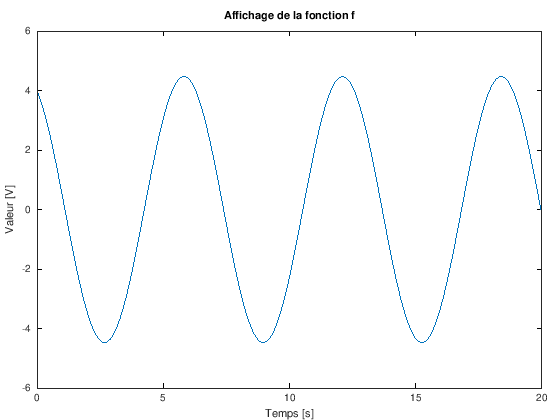

In [17]:
clear all;
close all;
%%_________
%% script qui affiche une fonction donnée

%% <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
%% UTILISATRICE CONFIGUREZ ICI LE SCRIPT
tmin = 0 ;  % premier instant affiché [s]
tmax = 20 ;  % dernier instant affiché [s]
Te =  0.1;  % période d'échantillonnage

%% fonction de x à afficher
%% décommentez une ligne
%fonction = @(x) 3*x + 4*cos(x)  ;
fonction = @(x) 4*cos(x)-2*sin(x)  ;
%fonction = @(x) 4*cos(1./x)  ;
%fonction = @(x) <votre fonction vectorisée de x>

%% FIN DE CONFIGURATION
%% >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

t = tmin:Te:tmax ;
f_de_t = fonction(t) ;

plot(t,f_de_t);
xlabel('Temps [s]');
ylabel('Valeur [V]');
title('Affichage de la fonction f')


**L'utilisatrice à le code source, sait exécuter un script et connait le langage**   
alors ne pas s'embêter.

## Déclaration de fonctions explicite (obsolète)

Pour déclarer une fonction en octave cela est similaire au langage ada.

Prenons l'exemple de la fonction qui calcule la valeur de l'onde complexe.

$f : x \mapsto e^{i.\omega.x}$ 

Remarquons que cette fonction dépend d'un paramètre $\omega$.


In [49]:
omega = 4

function y = f(x)
    y = exp(i*omega*x)
end

f(3)

omega =  4
error: 'omega' undefined near line 2 column 15
error: called from
    f at line 2 column 7


Et oui, en informatique  un paramètre doit être donné explicitement ou bien déclaré comme visible partout (dangereux)!

On peutdonc définir deux fonctions :
   - `fomega(x)` qui est paramétrée par une variable globale `omega`  (effets de bord dangereux !)
   - `f(x,omega)` qui est une fonction de deux variables 

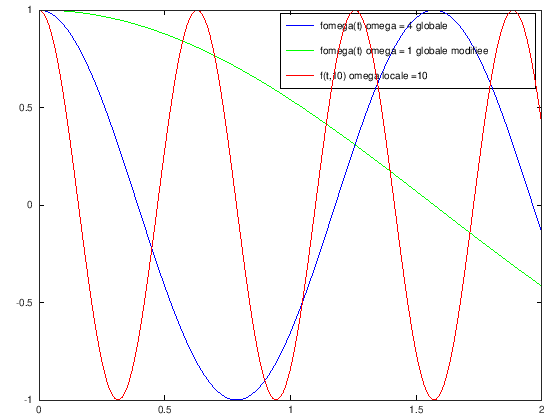

In [57]:
clear all;
global omega=4;
t=0:0.01:2;

function y = fomega(x)
    global omega;
    y = exp(i*omega*x);
end

function y = f(x, omega)
    y = exp(i*omega*x);
end

plot(t,fomega(x=t),'b');
hold on;

omega=1;
plot(t,fomega(x=t),'g');

plot(t,f(x=t, w=10),'r');
legend(["fomega(t) omega = 4 globale";"fomega(t) omega = 1 globale modifiee";"f(t,10) omega locale =10"])

On peut mettre une fonction dans un fichier du même nom par exemple ici `fomega.m` et `f.m`.

Si ces fichiers sont **dans le même répertoire que le scritp** alors ce script peut les utiliser sans déclarations.

## Déclaration de fonctions inline ou anonymes
---

Une fonction mathématique qui s'exprime  en une ligne de calcul peut être   
 **déclarée en une seule ligne**.
 

 > Syntaxe de la déclaration avec @   
 > @(x,y,z)  <expression mathématique en fonction de x,y,z>   
 > Par exemple:   
 > `@(x) = x * x` est la fonction de $\mathbb{C}\to\mathbb{C}$ de graphe $x\mapsto x^2$   
 > On peut la vectoriser avec :   
 > `@(x) = x .* x` et la fonction est alors de $\mathbb{C}^n\to\mathbb{C}^n$ de graphe $X\mapsto \left(x_i^2\right)_{1\leq i\leq n}$   
 >  par polymorphisme x peut être   
 >   - une matrice et la fonction est de  $\mathcal{M}_{n,m}\left(\mathbb{C}\right)\to \mathcal{M}_{n,m}\left(\mathbb{C}\right)$ de graphe $X\mapsto \left(x_{i,j}^2\right)_{\substack{1\leq i\leq n \\1\leq j\leq m}}$   
 >   - un tenseur ou matrice de dimension 3, etc.
 
 Remarquez que cette fonction n'as pas de nom !   
 Cela peut servir lorsquel'on doit passer une fonction en argument à une commande.
 
 Par exemple la fonction `quad` permet d'intégrer une fonction (pas un tableau de valeurs) avec une méthode numérique avancée (faire `help quad` pour les détails). Mais il faut lui donner une fonction !
 
 On peut nommer une fonction anonyme en l'affectant à une variable qui sera de type "fonction".

In [58]:
quad( @(x) x, 1, 2)   % Intégrer l'"x" de l'année 1 à 2 de prépa = 3/2
quad( @(x) x, 2, 3)   % Intégrer l'"x" de l'année 2 à 3 de prépa = 5/2
quad( @sin,0,pi)      % intégrer sin sur une demi alternance : @sin <-> "la fonction sin"
                    %                                          sin <-> appelle la fonction sin
disp("la méthode numérique n'intègre pas des complexes :")
quad( @fomega,0,pi) %  notre fonction fomega s'intègre aussi mais c'est une fonction dans C !
% donnons un nom à une fonction anonyme
puissance = @(x) sin(x).^2;
energie_periode = quad( puissance, 0, 2*pi) % énergie d'une période de sin 
puissance_moyenne = energie_periode / (2*pi)

ans =  1.5000
ans =  2.5000
ans =  2
la méthode numérique n'intègre pas des complexes :
ans =    4.9226e-17
energie_periode =  3.1416
puissance_moyenne =  0.50000


### Sans effets de bord 

Attention ! Cette déclaration peut utiliser une valeur de paramètre **au moment où elle est déclarée**.

On peut avoir des surprises et mieux vaux passer tous les paramètres explicitement.

Reprenons notre fonction f :

error: 't' undefined near line 1 column 6
error: 't' undefined near line 1 column 6


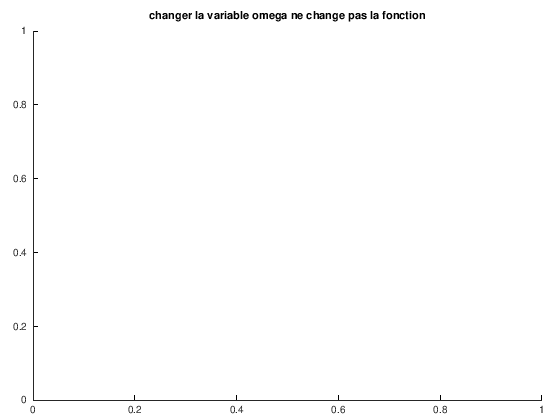

In [1]:
omega = 4;

f = @(x) exp(i*omega*x) ;  % vectorisée puisque omega est scalaire

plot(t,f(t),'r+-');
hold on;

omega = 10;
plot(t,f(t),'go');

title("changer la variable omega ne change pas la fonction")

Et oui ! lors de la déclaration de la fonction f, omega vallait 4.

Changer la valeur de omega ensuite, ne change pas la fonction f...

Mieux vaut passer plusieurs paramètres explicitement.   
Ou bien  déclarer une fonction par valeur de paramètre !

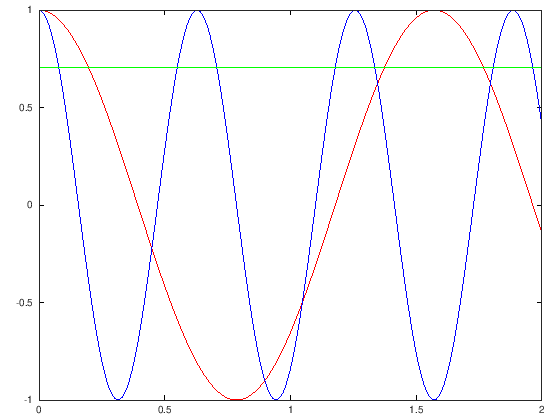

In [60]:
f = @(x,w) exp(i*w*x) ;
omega = 4;
f_de_t = f(x=t, w=omega);    % passage explicite des params
plot(t,f_de_t,'r');

hold on;
omega = 10;    
plot(t,f(t,omega),'b');         % passage implicite par ordre

% Déclarons la fonction pour omega =0 
% C'est donc la fonction constante
constante = @(x) f(x=x,w=0); % vectorisée si f(x,w) vectorisée
plot(t,sqrt(2)/2*constante(t),'g')

Remarquez bien qu'en informatique comme en mathématique, il ne faut pas confondre
  - la fonction $f:\mathbb{R^2}\to \mathbb{R}$ mathématique associée en informatique à la fonction anonyme `f`
  - l'évaluation la fonction $f(x,w)\in\mathbb{R}$ mathématique qui est une variable ou un tableau `f_de_t` ou `f(t)`dans cet example.
  

In [63]:
t=0:4;
f_de_t=f(t,1);
f
f_de_t
f(x=0,w=1)
f(4,1)

f =

@(x, w) exp (i * w * x)

f_de_t =

 Columns 1 through 3:

   1.00000 + 0.00000i   0.54030 + 0.84147i  -0.41615 + 0.90930i

 Columns 4 and 5:

  -0.98999 + 0.14112i  -0.65364 - 0.75680i

ans =  1
ans = -0.65364 - 0.75680i


## Exercice
---

Faites un script smart avec une partie configuration pour que l'utilisatrice puisse rentrer :
  - un instant de debut tmin
  - un instant de fin tmax
  - un nombre de points N à afficher entre tmin et tmax inclus
  - une fonction f à afficher
  
La fonction f à afficher proposée par défaut sera **le cosinus causal**


In [26]:
clear all;
close all;

%%______________________________________
%% Programme qui affiche une fonction 

%% <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
%% Utilisatrice, configurez ces lignes SVP

% VOTRE CODE de config 
% avec des commentaires USER friendly


% un exemple de déclaration de f 
% avec le cas du cosinus causal 
% BIEN VECTORISER le calcul !

%% Fin de la zone de configuration
%% >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


%% VOTRE CODE t=
% allant de tmin à tmax avec N points 
t=1:0.5:4; 

%% VOTRE CODE f_de_t =
% appelant la fonction f de l'utilisatrice

%% VOTRE plot 
% ajoutez les axes x et y commentés et un titre



---
#  Séance 2 : équivalent exo 4 du sujet standard
---

L' [exercice 4](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24759#page=7) final vous demande :  
 - Afficher le signal $f_1 : t\mapsto 2.\cos\left(\frac{2\pi}{10}.t\right)$ dans un intervale  allant de 0 à 10.
 - Calculer numériquement l'initégrale puis sa valeur moyenne.
 - Avec une partie configurable SMART du scrit, vous pourrez affecteur le **Test moodle** en utilisant votre script.
 - BONUS paramétrez votre script pour faire [Exo 2 poly page 95](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#page=95) et visualiser la période du signal, calculer la valeur moyenne $a_0$, etc.




## 1  Affichage
---

Reprenez votre script de [l'exercice précédent](intro_octave_2.ipynb#Exercice)  et réutilisez le [corrigé de l'exo 1 à 3](intro_octave_1_corr.ipynb#Exercice-final--(une-solution)) pour 

> faire un script `noms_du_binome_td.m` qui soit [paramétrable SMART](intro_octave_2.ipynb#Version-smart-and-easy)
> qui   
>  - utilise une fonction anonyme `f` issue du paramétrage de l'utilisatrice     
>  - calcule un vecteur temps `t` allant de `tmin` à `tmax` par pas de `Te` issue du paramétrage de l'utilisatrice     
>  - evalue la fonction aux instants de `t` dans un vecteur `f_de_t`   
>  - effectue un affichage clair


# 2 Calcul d'intégrale Rieman
---

L'intégrale de Rieman s'approche numériquement en utilisant un pas d'échantillonnage $dt$ petit et en évaluant la fonction tout les $dt$.



L'aire sous la courbe est ainsi approchée :

<img title="intégrale de Rieman" alt="Alt text" src="../images/integrale_Riemann.png" width="400">

Ne pas confondre 
 * une intégrale qui est **un nombre scalaire** (lorsqu'elle converge) :   
$\int\limits_a^b f(t). dt = F(a) - F(b) = \lim\limits_{dx\to 0}\sum\limits_{k=0}^N f\left(k.dx\right).dx$    
  **C'est un nombre !** qui est la surface sous la courbe de $a$ à $b$ fixés et connus.
 * la primitive $F$ d'une fonction $f$ qui dépend d'une borne   
   $F : a \mapsto \int\limits_{0}^{a}f(t).dt$  
   **C'est donc une fonction !** qui pour un $a$ donné renvoie la surface sous la courbe de 0 à $a$

  
Nous cherchons ici à calculer une intégrale et donc un nombre.


## Calculez l'intégrale demandée
---

Le but est maintenant de calculer $\sum\limits_{k=0}^N f\left(k.dx\right).dx$ à l'aide de vos vecteurs et variables matlab.

Faites le lien entre cette formule, son schéma, ses noms de variables,  avec les variables de votre scripts :
| $f \iff $ | `f` ou `f_de_t` ou `f(t)|
|-----------|----------------|
| $dx$      | `tmin` ou `tmax`ou `Te`|
| $a$       | `tmin` ou `tmax`ou `Te`|
| $b$       | `tmin` ou `tmax`ou `Te`|
| $x$       | `t` ou `f(t)`|
| $N$       | à calculer ou utiliser `length` | 

Vous pouvez utiliser une boucle for et une variable de cumulation `somme`, ou simplement appeler la fonction `sum` de matlab.

Pour vous aider, vous pouvez regarder les exemples suivants


# Exemples pour vous inspirer 
--- 

Vous pouvez utiliser la commande `help` pour voir comment utiliser une fonction et avoir des exemples :
``` octave
   help for

   help sum
```
En complément voici des exemples proches de ce qu'il faut faire 

## Exemple d'utilisation de `sum` : la somme partielle d'une suite géométrique

Rappelons que la formule de répétition causale $f_r$ d'un signal impulsion $f$ répété N fois avec une période $T_0$ donnant la transformée de Laplace est :

$F_r(p) = F(p) . (e^{-0.Te.p} + \ldots + e^{-N.Te.p})$

où l'on voit que la somme des retards est une suite géométrique de raison $r=e^{-T_e.p}\in\mathrm{C}$.

Cette **série** géométrique (on parle donc de la suite des sommes partielles) peut converger vers $S_N=\frac{r^{N+1}-r^0}{r-1}\underset{N\to+\infty}{\rightarrow}\frac{1}{1-r}$ ssi $|r|<1$ ce qui impose certaines choses sur la valeur de p.

Ce qui donne pour une répétition infinie :

$F_r(p) = F(p) . \frac{1}{1 - e^{-Te.p}}$


Le programme si dessous calcule une somme partielle pour une valeur de $p$ et $T_0$ donnée :

In [5]:
% exemple de l'utilisation de sum pour calculer une somme partielle de suite géométrique
Te=1;
Tau = 0:Te:3*Te % les retards
p = 1+i; % une des valeurs possible de la variable de Laplace

% Laplaces pour tous les retards Tau pour une seule valeur de p
Laplace = exp(-Tau*p)  % vectorisé ! Tau est (4,1), p est scalaire
                       % Laplace est (4,1)
                       
Somme_Numerique = sum(Laplace) % somme de tous les retards de Laplace (4,1)  
% on vérifie avec la formule de somme partielle
Somme_Analytique=(exp(-4*p)-exp(0*p))/(exp(-p)-1)

Tau =

   0   1   2   3

Laplace =

 Columns 1 through 3:

   1.00000 - 0.00000i   0.19877 - 0.30956i  -0.05632 - 0.12306i

 Column 4:

  -0.04929 - 0.00703i

Somme_Numerique =  1.09316 - 0.43965i
Somme_Analytique =  1.09316 - 0.43965i


## Exemple d'utilisation de `for` : calcul de factorielle

Programme un peu stupide pour calculer la factorielle : on stocke dans un tableau `v` les valeurs de 1 à 4  et ensuite on multiplie chaque élément de ce tableau. 

In [23]:
% exemple de boucle dans un tableau pour calculer une factorielle
v=1:4
factorielle = 1 ;
% exemple pour boucler dans un tableau
for indice = 1:length(v)
    factorielle = factorielle * v(indice) ;
end

factorielle % sans ; pour afficher

v =

   1   2   3   4

factorielle =  24
